### Are there variables that are particularly significant in terms of explaining the answer to your project question?
-- Performed Chi2 test and checked the dependencies between target variable and independent variables.
<br>-- Dependencies with the target variable is identified and these dependencies will help in the model building

<br>

### Are there significant differences between subgroups in your data that may be relevant to your project aim?
-- Performed Hypothesis testing and there were significant difference in the mean of two subgroups (i.e) Means of columns filtered by Fraud & Not Fraud
<br>-- Whenever p is less than alpha, then the there's a difference in means. And these columns highly influence the classification model
<br>

### Are there strong correlations between pairs of independent variables or between an independent and a dependent variable?
-- Correlation is identified between different variables and this helps to eliminate multi collinearity while building the model
<br>

### What are the most appropriate tests to use to analyze these relationships?
-- Chi2 test to analyze 2 categorical variables
<br>-- T-Test to analyze 1 categorical & 1 continuous variable
<br>-- Corr Plot to analyze 2 continuous variables

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import ttest_ind, chi2_contingency
import matplotlib.pyplot as plt

In [2]:
bene = pd.read_csv("Train_Beneficiarydata-1542865627584.csv")
inpat = pd.read_csv("Train_Inpatientdata-1542865627584.csv")
outpat = pd.read_csv("Train_Outpatientdata-1542865627584.csv")
train_classification = pd.read_csv("Train-1542865627584.csv")

In [3]:
inpat_bene = pd.merge(inpat, bene, left_on = 'BeneID',right_on = 'BeneID', how = 'left')

In [4]:
outpat_bene = pd.merge(outpat, bene, left_on = 'BeneID',right_on = 'BeneID', how = 'left')

In [5]:
train = pd.concat([inpat_bene, outpat_bene])

In [6]:
train = pd.merge(train_classification, train, left_on = 'Provider',right_on = 'Provider', how = 'left')

In [7]:
train['DOB'] = pd.to_datetime(train['DOB'])
train['DOD'] = pd.to_datetime(train['DOD'])
train['ClaimEndDt'] = pd.to_datetime(train['ClaimEndDt'])
train['ClaimStartDt'] = pd.to_datetime(train['ClaimStartDt'])
train['AdmissionDt'] = pd.to_datetime(train['AdmissionDt'])
train['DischargeDt'] = pd.to_datetime(train['DischargeDt'])
train.drop(['ClmProcedureCode_6'], axis=1, inplace=True)
train.drop(['ClmProcedureCode_5'], axis=1, inplace=True)
train['Race'] = train['Race'].astype('category')
train['Gender'] = train['Gender'].astype('category')
train['State'] = train['State'].astype('category')
train['County'] = train['County'].astype('category')
train['NoOfMonths_PartACov'] = train['NoOfMonths_PartACov'].astype('category')
train['NoOfMonths_PartBCov'] = train['NoOfMonths_PartBCov'].astype('category')
train['RenalDiseaseIndicator'] = train['RenalDiseaseIndicator'].astype('category') 
train['ChronicCond_Alzheimer'] = train['ChronicCond_Alzheimer'].astype('category') 
train['ChronicCond_Heartfailure'] = train['ChronicCond_Heartfailure'].astype('category') 
train['ChronicCond_KidneyDisease'] = train['ChronicCond_KidneyDisease'].astype('category')
train['ChronicCond_Cancer'] = train['ChronicCond_Cancer'].astype('category') 
train['ChronicCond_ObstrPulmonary'] = train['ChronicCond_ObstrPulmonary'].astype('category') 
train['ChronicCond_Depression'] = train['ChronicCond_Depression'].astype('category') 
train['ChronicCond_Diabetes'] = train['ChronicCond_Diabetes'].astype('category') 
train['ChronicCond_IschemicHeart'] = train['ChronicCond_IschemicHeart'].astype('category') 
train['ChronicCond_Osteoporasis'] = train['ChronicCond_Osteoporasis'].astype('category') 
train['ChronicCond_rheumatoidarthritis'] = train['ChronicCond_rheumatoidarthritis'].astype('category') 
train['ChronicCond_stroke'] = train['ChronicCond_stroke'].astype('category') 
train['PotentialFraud'] = train['PotentialFraud'].astype('category')

In [8]:
train.head().transpose()

,0,1,2,3,4
Provider,PRV51001,PRV51001,PRV51001,PRV51001,PRV51001
PotentialFraud,No,No,No,No,No
BeneID,BENE36012,BENE38773,BENE98831,BENE102690,BENE152088
ClaimID,CLM58316,CLM52334,CLM36844,CLM49733,CLM37205
ClaimStartDt,2009-07-04 00:00:00,2009-05-23 00:00:00,2009-02-03 00:00:00,2009-05-04 00:00:00,2009-02-06 00:00:00
ClaimEndDt,2009-07-08 00:00:00,2009-05-25 00:00:00,2009-02-08 00:00:00,2009-05-18 00:00:00,2009-02-06 00:00:00
InscClaimAmtReimbursed,36000,12000,3000,42000,4000
AttendingPhysician,PHY340163,PHY346762,PHY383193,PHY383193,PHY402229
OperatingPhysician,NaN,NaN,NaN,PHY378091,PHY329739
OtherPhysician,NaN,NaN,NaN,PHY389113,NaN


In [9]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
InscClaimAmtReimbursed,558211.0,997.012133,3821.534891,0.0,40.00,80.0,300.0,125000.0
DeductibleAmtPaid,557312.0,78.421085,274.016812,0.0,0.00,0.0,0.0,1068.0
ClmProcedureCode_1,23310.0,5896.154612,3050.489933,11.0,3848.00,5363.0,8669.0,9999.0
ClmProcedureCode_2,5490.0,4106.358106,2031.640878,42.0,2724.00,4019.0,4439.0,9999.0
ClmProcedureCode_3,969.0,4221.123839,2281.849885,42.0,2724.00,4019.0,5185.0,9999.0
ClmProcedureCode_4,118.0,4070.262712,2037.626990,42.0,2754.25,4019.0,4439.0,9986.0
IPAnnualReimbursementAmt,558211.0,5227.971466,11786.274732,-8000.0,0.00,0.0,6000.0,161470.0
IPAnnualDeductibleAmt,558211.0,568.756807,1179.172616,0.0,0.00,0.0,1068.0,38272.0
OPAnnualReimbursementAmt,558211.0,2278.225348,3881.846386,-70.0,460.00,1170.0,2590.0,102960.0
OPAnnualDeductibleAmt,558211.0,649.698745,1002.020811,0.0,120.00,340.0,790.0,13840.0


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558211 entries, 0 to 558210
Data columns (total 53 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   Provider                         558211 non-null  object        
 1   PotentialFraud                   558211 non-null  category      
 2   BeneID                           558211 non-null  object        
 3   ClaimID                          558211 non-null  object        
 4   ClaimStartDt                     558211 non-null  datetime64[ns]
 5   ClaimEndDt                       558211 non-null  datetime64[ns]
 6   InscClaimAmtReimbursed           558211 non-null  int64         
 7   AttendingPhysician               556703 non-null  object        
 8   OperatingPhysician               114447 non-null  object        
 9   OtherPhysician                   199736 non-null  object        
 10  AdmissionDt                      40474 non-n

# Chi Square Test
<br>#Reference
<br>https://medium.com/@nhan.tran/the-chi-square-statistic-p-1-37a8eb2f27bb
<br>https://medium.com/@nhan.tran/the-chi-square-statistic-p-2-92ed4bcefd3
<br>https://medium.com/@nhan.tran/the-chi-square-statistic-p3-programming-with-python-87eb079f36af

In [11]:
columnList = ['Race', 'Gender', 'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'RenalDiseaseIndicator', 'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease', 'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression', 'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke']

print('\n')  
print("=====================================================================================================")
print('\n')            


for i in columnList:
    print("Chi2 Test - "+i+" and PotentialFraud")
    print("Null Hypothesis        - The columns "+i+" and PotentialFraud are dependent")
    print("Alternate Hypothesis   - The columns "+i+" and PotentialFraud are independent")    
    chi2, p, dof, expected = chi2_contingency(pd.crosstab(index=train[i], columns=train["PotentialFraud"]))
    print (f'Chi-square Statistic : {chi2} ,p-value: {p}')  
    if p < 0.05:
        print("Since p is less than alpha (0.05), Null Hypothesis is rejected (i.e) the columns "+i+" and PotentialFraud are independent") 
    else:
        print("Since p is greater than alpha (0.05), Null Hypothesis cannot be rejected (i.e) the columns "+i+" and PotentialFraud are dependent")
    print('\n')        
    print("=====================================================================================================")
    print('\n')            





Chi2 Test - Race and PotentialFraud
Null Hypothesis        - The columns Race and PotentialFraud are dependent
Alternate Hypothesis   - The columns Race and PotentialFraud are independent
Chi-square Statistic : 703.9414756354904 ,p-value: 2.933423389758317e-152
Since p is less than alpha (0.05), Null Hypothesis is rejected (i.e) the columns Race and PotentialFraud are independent




Chi2 Test - Gender and PotentialFraud
Null Hypothesis        - The columns Gender and PotentialFraud are dependent
Alternate Hypothesis   - The columns Gender and PotentialFraud are independent
Chi-square Statistic : 0.1159573914685894 ,p-value: 0.7334610711386262
Since p is greater than alpha (0.05), Null Hypothesis cannot be rejected (i.e) the columns Gender and PotentialFraud are dependent




Chi2 Test - State and PotentialFraud
Null Hypothesis        - The columns State and PotentialFraud are dependent
Alternate Hypothesis   - The columns State and PotentialFraud are independent
Chi-square Statist

# Hypothesis Testing of 2 means
<br>Reference: https://towardsdatascience.com/inferential-statistics-series-t-test-using-numpy-2718f8f9bf2f

In [12]:
columnList = ['InscClaimAmtReimbursed', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt']
Fraud = train['PotentialFraud'] == 'Yes'
Not_Fraud = train['PotentialFraud'] == 'No'

print('\n')  
print("=====================================================================================================")
print('\n')            


for i in columnList:
    print("T-Test - "+i+" and PotentialFraud")
    print("Null Hypothesis         - Mean of Fraud_"+i+" & Not_Fraud_"+i+" are the same")
    print("Alternate Hypothesis    - Mean of Fraud_"+i+" & Not_Fraud_"+i+" are different")    
    a = train.loc[Fraud,i]
    b = train.loc[Not_Fraud,i]
    t, p = ttest_ind(a,b)
    print ('t-value : {0} ,p-value: {1}'.format(t,p))  
    if p < 0.05:
        print("Since p is less than alpha (0.05), Null Hypothesis is rejected (i.e) Mean of Fraud_"+i+" & Not_Fraud_"+i+" are different")
    else:
        print("Since p is greater than alpha (0.05), Null Hypothesis cannot be rejected (i.e) Mean of Fraud_"+i+" & Not_Fraud_"+i+" are the same")
    print('\n')  
    print("=====================================================================================================")
    print('\n')  
        






T-Test - InscClaimAmtReimbursed and PotentialFraud
Null Hypothesis         - Mean of Fraud_InscClaimAmtReimbursed & Not_Fraud_InscClaimAmtReimbursed are the same
Alternate Hypothesis    - Mean of Fraud_InscClaimAmtReimbursed & Not_Fraud_InscClaimAmtReimbursed are different
t-value : 60.42542046089504 ,p-value: 0.0
Since p is less than alpha (0.05), Null Hypothesis is rejected (i.e) Mean of Fraud_InscClaimAmtReimbursed & Not_Fraud_InscClaimAmtReimbursed are different




T-Test - IPAnnualReimbursementAmt and PotentialFraud
Null Hypothesis         - Mean of Fraud_IPAnnualReimbursementAmt & Not_Fraud_IPAnnualReimbursementAmt are the same
Alternate Hypothesis    - Mean of Fraud_IPAnnualReimbursementAmt & Not_Fraud_IPAnnualReimbursementAmt are different
t-value : 26.185698056292527 ,p-value: 4.7755661794496094e-151
Since p is less than alpha (0.05), Null Hypothesis is rejected (i.e) Mean of Fraud_IPAnnualReimbursementAmt & Not_Fraud_IPAnnualReimbursementAmt are different




T-Test - IP

In [13]:
#Correlation is required to analyze 2 continuous variables.
corr = train.corr()
corr

,InscClaimAmtReimbursed,DeductibleAmtPaid,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
InscClaimAmtReimbursed,1.000000,0.665488,-0.145059,0.108619,0.136799,-0.080588,0.383701,0.225477,0.064411,0.030561
DeductibleAmtPaid,0.665488,1.000000,-0.006736,-0.010818,0.036194,-0.000524,0.282815,0.308890,-0.027973,-0.033844
ClmProcedureCode_1,-0.145059,-0.006736,1.000000,0.028000,0.051397,0.072560,-0.079482,0.022757,0.002233,0.002422
ClmProcedureCode_2,0.108619,-0.010818,0.028000,1.000000,0.028871,0.097080,0.087785,0.017404,0.044539,0.033314
ClmProcedureCode_3,0.136799,0.036194,0.051397,0.028871,1.000000,0.119042,0.129844,0.044914,-0.004081,-0.010662
ClmProcedureCode_4,-0.080588,-0.000524,0.072560,0.097080,0.119042,1.000000,-0.023149,0.004546,0.028952,0.035054
IPAnnualReimbursementAmt,0.383701,0.282815,-0.079482,0.087785,0.129844,-0.023149,1.000000,0.642743,0.178841,0.163073
IPAnnualDeductibleAmt,0.225477,0.308890,0.022757,0.017404,0.044914,0.004546,0.642743,1.000000,0.138267,0.137045
OPAnnualReimbursementAmt,0.064411,-0.027973,0.002233,0.044539,-0.004081,0.028952,0.178841,0.138267,1.000000,0.837335
OPAnnualDeductibleAmt,0.030561,-0.033844,0.002422,0.033314,-0.010662,0.035054,0.163073,0.137045,0.837335,1.000000


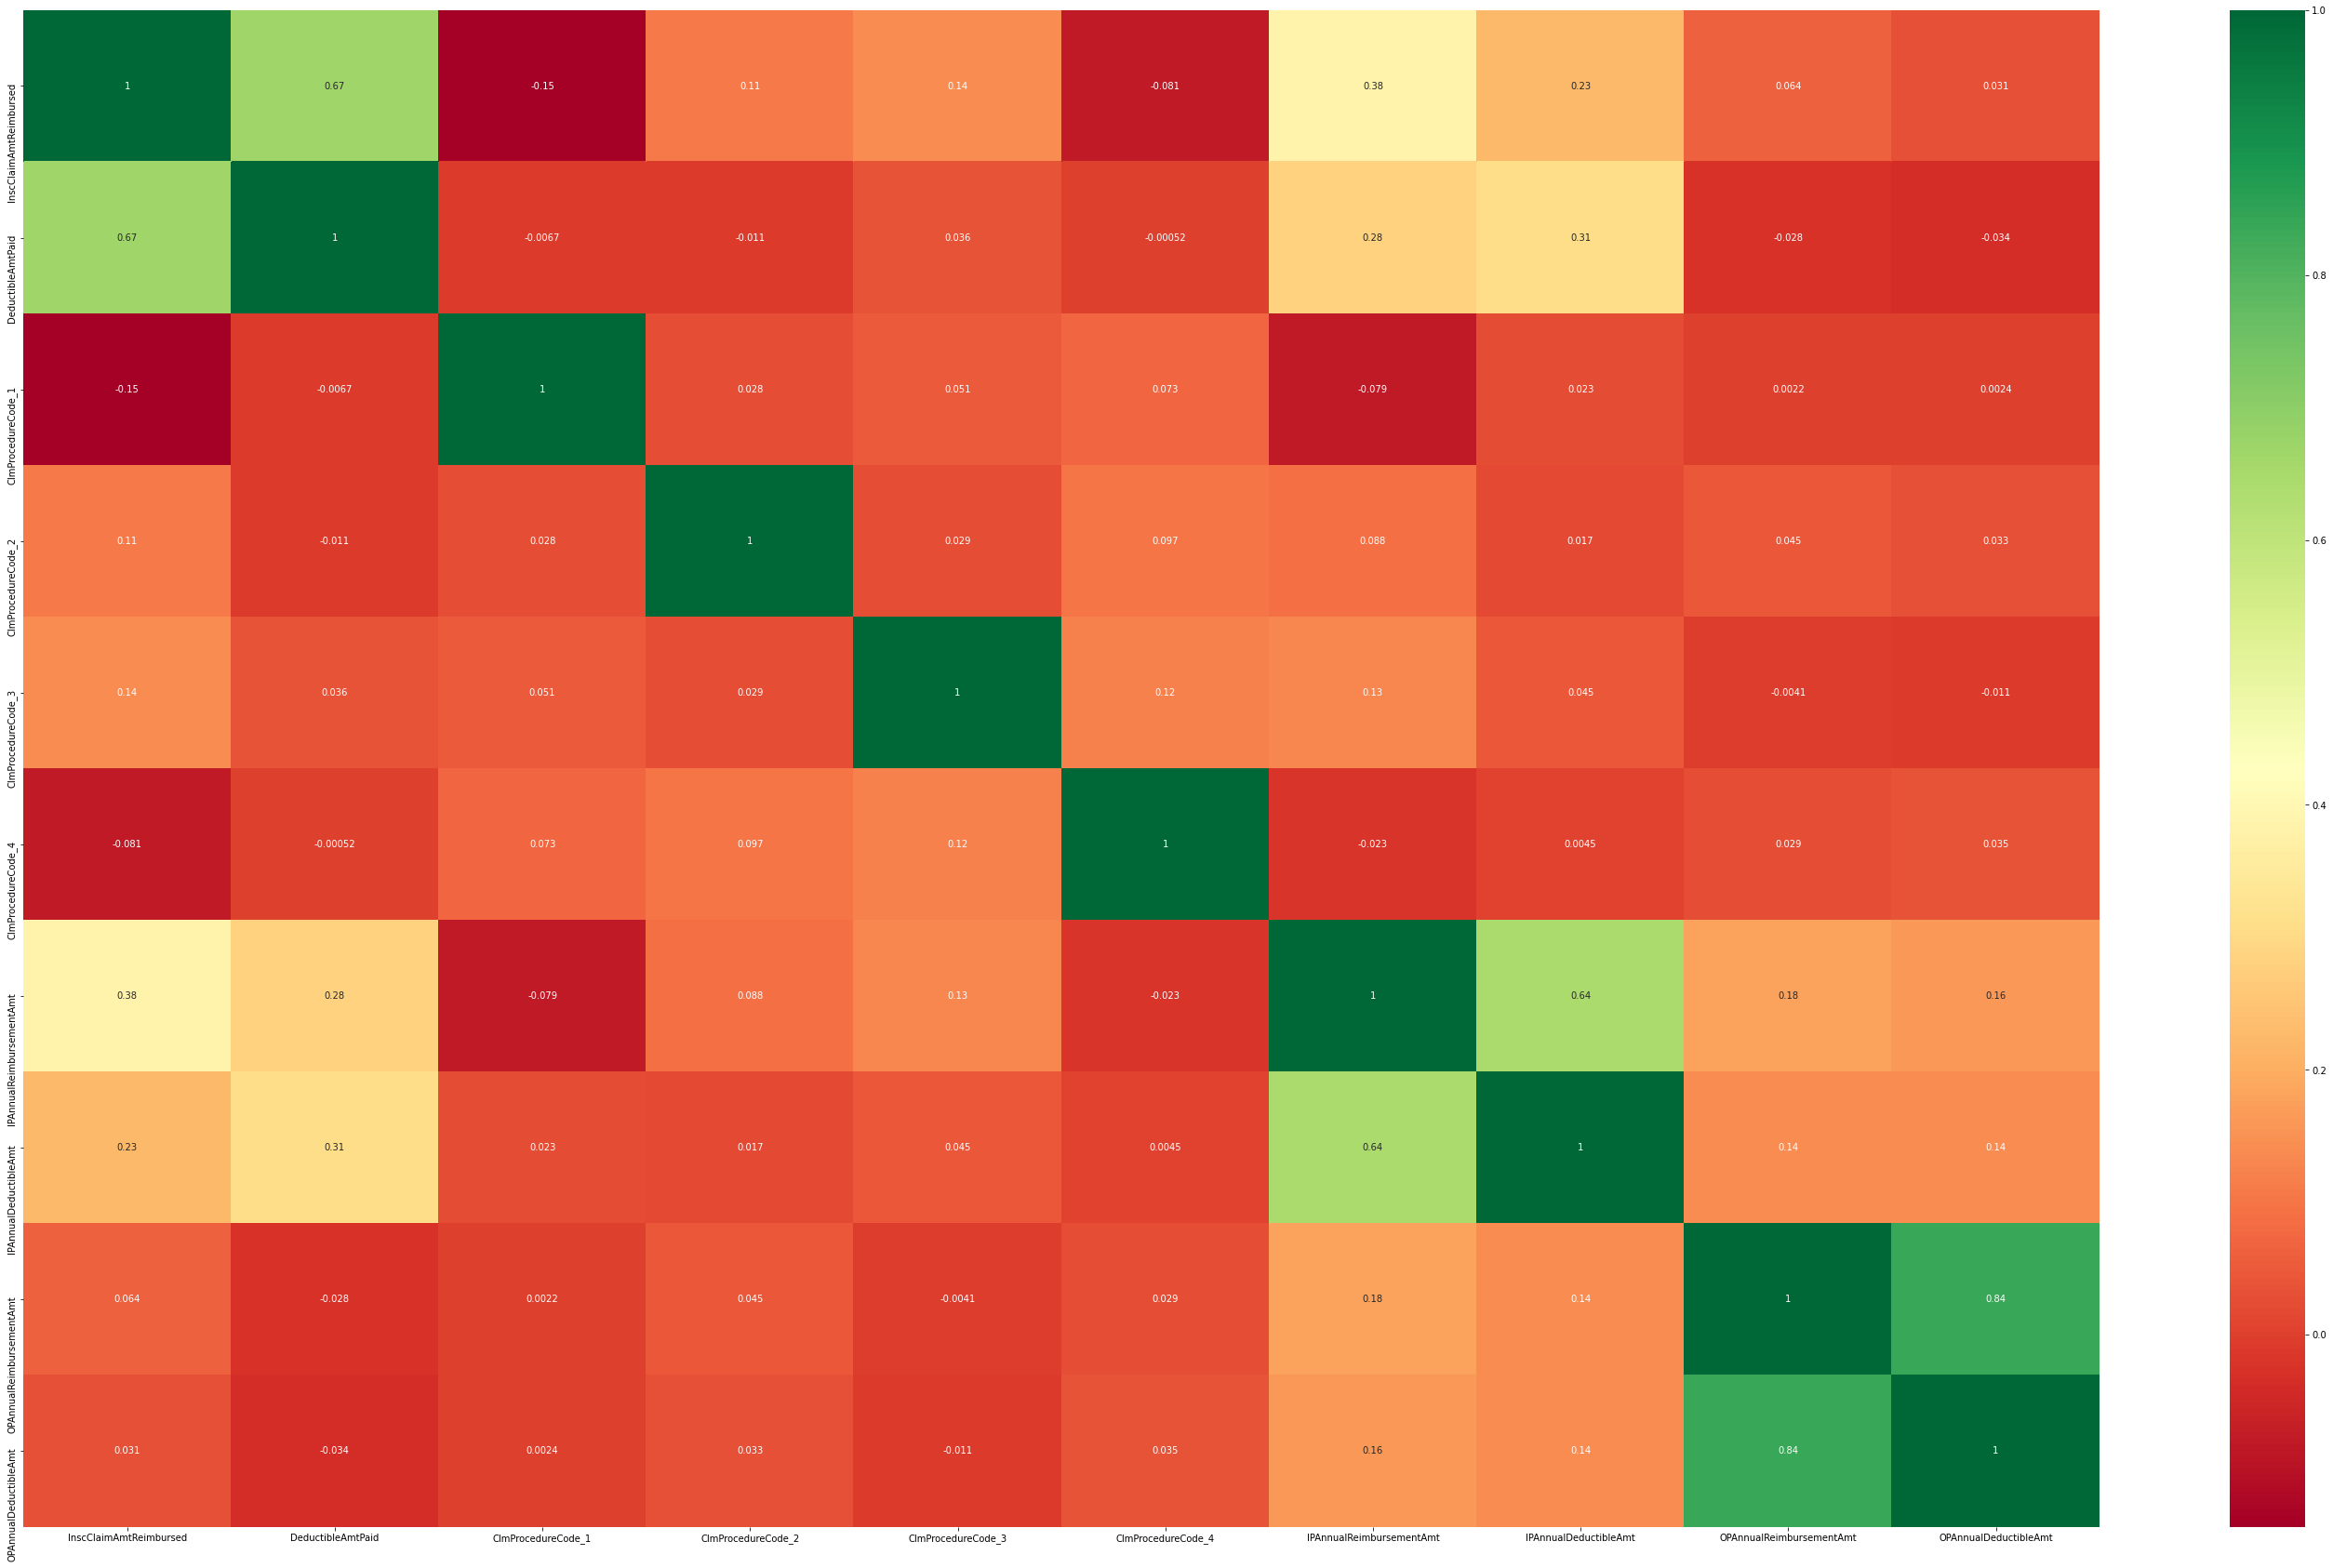

In [14]:
### inroder to get a better picture about the correlation,we are following the below steps
corr = train.corr()
top_corr_features = corr.index
plt.figure(figsize=(50,30))
#plot heat map
g=sns.heatmap(train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

**From the above plot we can see that there are few columns that are positively correlated (dark green) and few columns which are negatively correlated (dark red)**